###  20 News Groups Corpus, Sample dataset included in scikit-learn
A collection of almost 20,000 articles on 20 different topics or 'newsgroups'.   
Corpus: Text Collection
more info: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html

In [41]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups

twenty_groups = fetch_20newsgroups(subset='all', random_state=21) 
# we will do cross validation, so we fetch all data
# random state again same for all of you, so you all have the same shuffling for having same results

### These are the groups that the text samples originated from.

In [42]:
twenty_groups.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

#### Seeing what is the class of first entry:

In [43]:
i=0
twenty_groups.target[i]

18

#### Index 9 is rec.sport.baseball, lets look at the first entry and see if it makes sense:

In [59]:
twenty_groups.data[i]

'From: klf@druwa.ATT.COM (FranklinKL)\nSubject: Re: V4 V6 V8 V12 Vx?\nSummary: How about a Beamer?\nLines: 33\n\nIn article <1993Apr24.150653.8115@magnus.acs.ohio-state.edu>, bqueiser@magnus.acs.ohio-state.edu (Brian J Queiser) writes:\n| cka52397@uxa.cso.uiuc.edu (OrioleFan@uiuc) writes:\n| >aas7@po.CWRU.Edu (Andrew A. Spencer) writes:\n| \n| >>i think that it is technicaly known as a 180 degree vee configuration.\n| >>(could be wrong....this is how i\'ve seen them referred to)\n| \n| >    Then what is a "Flat-" engine???\n| \n| flat = 180 deg V = horizonatlly opposed\n| \n| Usually, it also equals "boxer," however, I think the term is\n| traditionally reserved for 8\'s and 12\'s (and firing order matters).\n| This was talked about here in r.a many months back; I can\'t remember\n| the consensus.\n| \n| Examples:\n| \n| Ferrari\'s 512TR is a flat 12 boxer.\n| Porsche\'s 911 is a flat 6.\n| Subaru\'s Impreza is a flat 4.\n| \n| Regards,\n| \n\nNot to inject a non-automotive note to thi

## Q1: Is the full dataset balanced for each class? Do a barchart.

(array([1772., 1967., 1951., 1965., 1990., 1990., 1974., 1984., 1850.,
        1403.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <BarContainer object of 10 artists>)

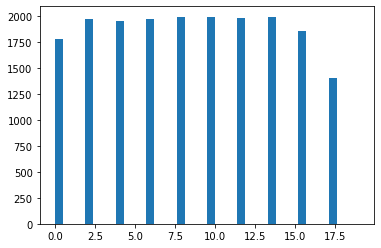

In [45]:
# ANSWER to Q1 goes here
########################
import matplotlib.pyplot as plt
plt.hist(twenty_groups.target, width = .5)


We want to work on a binary classification example.
Let's focus on one class 'misc.forsale', and name the rest as others.

Or let's say we wanted to have a model for detecting sales related emails, and 
used this dataset to train that model

In [46]:
type(twenty_groups.target_names)

list

In [47]:
twenty_groups.target_names.append('others')

In [48]:
len(twenty_groups.target_names)

21

In [49]:
for i in range(0,21):
  print(str(i) + " " + twenty_groups.target_names[i])

0 alt.atheism
1 comp.graphics
2 comp.os.ms-windows.misc
3 comp.sys.ibm.pc.hardware
4 comp.sys.mac.hardware
5 comp.windows.x
6 misc.forsale
7 rec.autos
8 rec.motorcycles
9 rec.sport.baseball
10 rec.sport.hockey
11 sci.crypt
12 sci.electronics
13 sci.med
14 sci.space
15 soc.religion.christian
16 talk.politics.guns
17 talk.politics.mideast
18 talk.politics.misc
19 talk.religion.misc
20 others


Since first class was 0, 'others' class will be index 20, we need to replace 
everything except 6 ("misc.forsale") with 20 in the target. 

In [50]:
twenty_groups.target[0]

18

In [51]:
twenty_groups.target[0]=20

In [52]:
twenty_groups.target[0] # I checked if I could really modify it!

20

In [53]:
twenty_groups.target[1] #second element

12

In [54]:
twenty_groups.target[-1] #last element

7

In [55]:
class_to_keep = 6
# now do it in a loop
for i in range(0,len(twenty_groups.target)):
  if twenty_groups.target[i]!= class_to_keep:
    twenty_groups.target[i]=20

In [56]:
twenty_groups.target[1] #second element

20

In [57]:
twenty_groups.target[-1] #last element

20

## Q2:Do another barchart to see the new class distribution.

(array([  975.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 17871.]),
 array([ 6. ,  7.4,  8.8, 10.2, 11.6, 13. , 14.4, 15.8, 17.2, 18.6, 20. ]),
 <BarContainer object of 10 artists>)

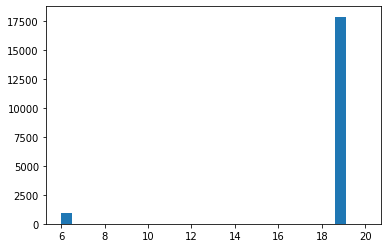

In [58]:
# ANSWER to Q2 goes here
########################
plt.hist(twenty_groups.target, width = .5)


In [60]:
from sklearn.model_selection import train_test_split

#Split the data to have a 10% validation set. 
twenty_g_X_train, twenty_g_X_test, twenty_g_y_train, twenty_g_y_test = \
train_test_split(twenty_groups.data, twenty_groups.target, 
                 test_size=0.10, random_state=21)

**PRE Q3:** Let's create a pipeline that creates the vectors representing the documents, and then classify them using 5 Nearest Neighbor classifier.


In [86]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier

pipe = Pipeline([('vect', TfidfVectorizer(stop_words='english')),
                 ('model', KNeighborsClassifier())])

# and do a gridsearchCV to do cross validation 
from sklearn.model_selection import GridSearchCV
# We are not doing hyperparameter optimization, so empty parameters dictionary passed
# Using GridSearchCV here, only for cross validation 
parameters = {}
grid_search = GridSearchCV(pipe, parameters, cv=10, verbose=1,n_jobs=-1)

# Running the experiments 
grid_search.fit(twenty_g_X_train, twenty_g_y_train)

**PreQ3c**: This is one way to display classification report: 

In [62]:
from sklearn.metrics import classification_report

# Using the predictor found to be best to predict the validation set
predicted1 = grid_search.predict(twenty_g_X_test)

from sklearn.metrics import classification_report
print(classification_report(twenty_g_y_test,
                            predicted1, 
                            target_names=["for-sale", "others"]))

from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(twenty_g_y_test, predicted1))

              precision    recall  f1-score   support

    for-sale       0.81      0.39      0.53       107
      others       0.96      0.99      0.98      1778

    accuracy                           0.96      1885
   macro avg       0.89      0.69      0.75      1885
weighted avg       0.96      0.96      0.95      1885

Accuracy: 0.9602122015915119


## Q3a: GridSearchCV for hyperparameter optimization
Rerun this experiment to see which k in kNN, gives best f1-score 
Use 
```
parameters = {"model__n_neighbors" : range(1,11,3)}
```
you will be testing for k values  [1, 4, 7, 10]

The experiments may take 5-10 minutes, as kNN classifier is not really a model, 
but compares with all entries in runtime!
 

In [91]:
# ANSWER to Q3a goes here
########################
parameters = {"model__n_neighbors" : range(1,11,3)}
grid_search = GridSearchCV(pipe, parameters, cv=10, verbose=0,n_jobs=-1)

# Running the experiments 
grid_search.fit(twenty_g_X_train, twenty_g_y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(stop_words='english')),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=-1, param_grid={'model__n_neighbors': range(1, 11, 3)})

In [92]:
# grid_search.cv_results_
for i in ['params','mean_test_score', 'std_test_score', 'rank_test_score']:
    print(i," : ",grid_search.cv_results_[i])

grid_search.best_params_

params  :  [{'model__n_neighbors': 1}, {'model__n_neighbors': 4}, {'model__n_neighbors': 7}, {'model__n_neighbors': 10}]
mean_test_score  :  [0.9671601  0.96432985 0.96385797 0.96303257]
std_test_score  :  [0.00244389 0.0014282  0.00284379 0.00286802]
rank_test_score  :  [1 2 3 4]


{'model__n_neighbors': 1}

In [93]:
# Using the predictor found to be best to predict the validation set
predicted2 = grid_search.predict(twenty_g_X_test)

print(classification_report(twenty_g_y_test,
                            predicted2, 
                            target_names=["for-sale", "others"]))

print("Accuracy:", accuracy_score(twenty_g_y_test, predicted2))

              precision    recall  f1-score   support

    for-sale       0.74      0.68      0.71       107
      others       0.98      0.99      0.98      1778

    accuracy                           0.97      1885
   macro avg       0.86      0.83      0.85      1885
weighted avg       0.97      0.97      0.97      1885

Accuracy: 0.9681697612732095


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

pipe = Pipeline([('vect', TfidfVectorizer(stop_words='english')),
                 ('model', LinearSVC())])

# and do a gridsearchCV to do cross validation 
from sklearn.model_selection import GridSearchCV
# We are not doing hyperparameter optimization, so empty parameters dictionary passed
# Using GridSearchCV here, only for cross validation 
parameters = {}
grid_search = GridSearchCV(pipe, parameters, cv=10, verbose=1)

# Running the experiments 
grid_search.fit(twenty_groups.data, twenty_groups.target)

## Q3b: Run again for 2,3
in 3a, you must found best accuracy happened at 1 and 4, so you want to look at 2, 3 too, maybe best is between k=1 and k=4.
use 


```
parameters = {"model__n_neighbors" : (2, 3)}
```



In [94]:
parameters = {"model__n_neighbors" : (2,3)}
grid_search = GridSearchCV(pipe, parameters, cv=10, verbose=0,n_jobs=-1)

# Running the experiments 
grid_search.fit(twenty_g_X_train, twenty_g_y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(stop_words='english')),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=-1, param_grid={'model__n_neighbors': (2, 3)})


For the best performing kNN classifier you found, 
##Q3c:  display classification_report like above in PreQc3, and 
##Q3d: the confusion matrix...

In [95]:
# ANSWER to Q3c goes here
########################
for i in ['params','mean_test_score', 'std_test_score', 'rank_test_score']:
    print(i," : ",grid_search.cv_results_[i])

grid_search.best_params_

params  :  [{'model__n_neighbors': 2}, {'model__n_neighbors': 3}]
mean_test_score  :  [0.95796227 0.96615754]
std_test_score  :  [0.00337873 0.00247794]
rank_test_score  :  [2 1]


{'model__n_neighbors': 3}

In [96]:
# Using the predictor found to be best to predict the validation set
predicted3 = grid_search.predict(twenty_g_X_test)

print(classification_report(twenty_g_y_test,
                            predicted3, 
                            target_names=["for-sale", "others"]))

print("Accuracy:", accuracy_score(twenty_g_y_test, predicted3))

              precision    recall  f1-score   support

    for-sale       0.85      0.50      0.63       107
      others       0.97      0.99      0.98      1778

    accuracy                           0.97      1885
   macro avg       0.91      0.75      0.80      1885
weighted avg       0.96      0.97      0.96      1885

Accuracy: 0.96657824933687


In [99]:
# ANSWER to Q3d goes here
########################
from sklearn.metrics import confusion_matrix
print (confusion_matrix(twenty_g_y_test, predicted3))



[[  53   54]
 [   9 1769]]
